In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split


#Linear Regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix


#Decision Tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz
import graphviz


from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
 

#### Random Forest
from sklearn.ensemble import RandomForestClassifier

#### Adaptive Boosting Regressor 
from sklearn.ensemble import AdaBoostRegressor

#### Adaptive Boosting Regressor Classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import ShuffleSplit 
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer 

#### Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import uniform

#Bagging
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import BaggingClassifier

#XGBoost Classifier
from xgboost import XGBClassifier, XGBRegressor



In [2]:
# Load the data into dataframe
df_conc_strength = pd.read_csv(r'concrete.csv')

In [3]:
#Check the first five rows 
df_conc_strength.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
df_conc_strength.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


### Describe the dataframe

In [5]:
df_conc_strength.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


### Data insight
1. Standard Deviation in the field "Cement","slag", "ash","coarseagg", "fineagg" and "age" seems to be high 
2. For the field "slag","ash" and "superplastic" is 0. After 

In [7]:
#Check the skewness in the data
df_conc_strength.skew(axis=0)

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

#### Data Insight
There is high skwness in the below fields 
1. cement
2. slag
3. ash
4. superplastic
5. age 
6. strength

### Reducing the Skewness in data

### Data Insight 
1. As the below fields are right skewed, perform square root on the fields so as to make the field more towards normal distribution
    1.1. cement
    
    1.2. slag
    
    1.3. ash
    
    1.4. strength
    
2. As the below fields are left skewed, perform square of the fields

    2.1. fineagg

In [8]:
#Reducing the Skewness in cement
df_conc_strength['cement_sqrt'] = np.sqrt(df_conc_strength['cement'])
df_conc_strength['cement_sqrt'].skew()

0.19019326098386738

In [9]:
#Reducing the Skewness in slag
df_conc_strength['slag_sqrt'] = np.sqrt(df_conc_strength['slag'])
df_conc_strength['slag_sqrt'].skew()

0.2568783403775916

In [10]:
#Reducing the skewness in ash
df_conc_strength['ash_sqrt'] = np.sqrt(df_conc_strength['ash'])
df_conc_strength['ash_sqrt'].skew()

0.30798275431589145

In [11]:
# Reducing the skewness in superplastic 
df_conc_strength['superplastic_sqrt'] = np.sqrt(df_conc_strength['superplastic'])
df_conc_strength['superplastic_sqrt'].skew()

-0.1608452984664174

In [12]:
#Reducing the Skewness in data
df_conc_strength['fineagg_sqr'] = np.square(df_conc_strength['fineagg'])
df_conc_strength['fineagg_sqr'].skew()

0.03705920691410835

In [13]:
#Reducing the Skewness in data
df_conc_strength['strength_sqrt'] = np.sqrt(df_conc_strength['strength'])
df_conc_strength['strength_sqrt'].skew()

-0.15420901592606107

### Data Insight
Skweness in the data has been reduced as compred to before reduction in skewness 

In [14]:
df_conc_strength.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,cement_sqrt,slag_sqrt,ash_sqrt,superplastic_sqrt,fineagg_sqr,strength_sqrt
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,11.886968,14.560220,0.000000,0.000000,560252.25,5.467175
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,12.996153,6.496153,11.148991,3.286335,633934.44,4.848711
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,15.811388,0.000000,9.782638,2.345208,741665.44,5.405553
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,16.309506,10.677078,0.000000,0.000000,448900.00,6.771263
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,12.441865,13.542526,0.000000,3.016621,485390.89,4.276681


In [15]:
### Kurtosis 
df_conc_strength.kurt(axis=0)

cement               -0.520652
slag                 -0.508175
ash                  -1.328746
water                 0.122082
superplastic          1.411269
coarseagg            -0.599016
fineagg              -0.102177
age                  12.168989
strength             -0.313725
cement_sqrt          -0.819594
slag_sqrt            -1.599647
ash_sqrt             -1.792743
superplastic_sqrt    -1.414870
fineagg_sqr          -0.086963
strength_sqrt        -0.429731
dtype: float64

### Unique counts in the dataframe 

In [16]:
### Get the unique value counts for each field in the dataframe
for ind in df_conc_strength.columns.values:
    print("#################################################################")
    print(ind,"unique value counts is ",df_conc_strength[ind].nunique())

#################################################################
cement unique value counts is  278
#################################################################
slag unique value counts is  185
#################################################################
ash unique value counts is  156
#################################################################
water unique value counts is  195
#################################################################
superplastic unique value counts is  111
#################################################################
coarseagg unique value counts is  284
#################################################################
fineagg unique value counts is  302
#################################################################
age unique value counts is  14
#################################################################
strength unique value counts is  845
#################################################################
cement_sqrt unique valu

In [17]:
abc = sorted(list(df_conc_strength['age'].unique()))
abc

[1, 3, 7, 14, 28, 56, 90, 91, 100, 120, 180, 270, 360, 365]

In [18]:
df_conc_str = df_conc_strength.copy()
df_conc_str.drop(['cement','slag','ash','superplastic','fineagg','strength'],axis=1, inplace=True)
df_conc_str.head()

,water,coarseagg,age,cement_sqrt,slag_sqrt,ash_sqrt,superplastic_sqrt,fineagg_sqr,strength_sqrt
0,203.5,971.8,28,11.886968,14.560220,0.000000,0.000000,560252.25,5.467175
1,158.3,1080.8,14,12.996153,6.496153,11.148991,3.286335,633934.44,4.848711
2,187.4,956.9,28,15.811388,0.000000,9.782638,2.345208,741665.44,5.405553
3,228.0,932.0,28,16.309506,10.677078,0.000000,0.000000,448900.00,6.771263
4,193.3,1047.4,28,12.441865,13.542526,0.000000,3.016621,485390.89,4.276681


In [19]:
df_conc_str.skew()

water                0.074628
coarseagg           -0.040220
age                  3.269177
cement_sqrt          0.190193
slag_sqrt            0.256878
ash_sqrt             0.307983
superplastic_sqrt   -0.160845
fineagg_sqr          0.037059
strength_sqrt       -0.154209
dtype: float64

### Outliers Identification and operation on outlier  

In [20]:
### Find out First Quartile, Second Quartile and Third Quartile for each field in the dataframe
quantile_dict = {'FIRST_QUART':0.25,'SECOND_QUART':0.5,'THIRD_QUART':0.75}
df_cement_quan = pd.DataFrame()
for key,values in quantile_dict.items():
    print(key,values)
    df_cement_quan[key] = df_conc_str.quantile(values)

### Dataframe having the quartile for each field
df_cement_quan

FIRST_QUART 0.25
SECOND_QUART 0.5
THIRD_QUART 0.75


,FIRST_QUART,SECOND_QUART,THIRD_QUART
water,164.900000,185.000000,192.000000
coarseagg,932.000000,968.000000,1029.400000
age,7.000000,28.000000,56.000000
cement_sqrt,13.869912,16.519685,18.708287
slag_sqrt,0.000000,4.690416,11.956169
ash_sqrt,0.000000,0.000000,10.876580
superplastic_sqrt,0.000000,2.529822,3.193744
fineagg_sqr,534288.810000,607620.290000,678976.000000
strength_sqrt,4.869291,5.868985,6.792270


In [21]:
### Get the interquartile value for each field
df_cement_quan['IQR'] = df_cement_quan['THIRD_QUART'] - df_cement_quan['FIRST_QUART']

In [22]:
### Get the minumum and maximum whisker value for each field
df_cement_quan['Min_Whisker']  = df_cement_quan['FIRST_QUART'] - 1.5*df_cement_quan['IQR']
df_cement_quan['Max_Whisker']  = df_cement_quan['THIRD_QUART'] + 1.5*df_cement_quan['IQR']

In [23]:
df_cement_quan

,FIRST_QUART,SECOND_QUART,THIRD_QUART,IQR,Min_Whisker,Max_Whisker
water,164.900000,185.000000,192.000000,27.100000,124.250000,232.650000
coarseagg,932.000000,968.000000,1029.400000,97.400000,785.900000,1175.500000
age,7.000000,28.000000,56.000000,49.000000,-66.500000,129.500000
cement_sqrt,13.869912,16.519685,18.708287,4.838375,6.612349,25.965850
slag_sqrt,0.000000,4.690416,11.956169,11.956169,-17.934254,29.890424
ash_sqrt,0.000000,0.000000,10.876580,10.876580,-16.314871,27.191451
superplastic_sqrt,0.000000,2.529822,3.193744,3.193744,-4.790616,7.984360
fineagg_sqr,534288.810000,607620.290000,678976.000000,144687.190000,317258.025000,896006.785000
strength_sqrt,4.869291,5.868985,6.792270,1.922979,1.984823,9.676738


In [24]:
# Get the count of records which are outliers

#Initialize outliers dictionary value
dict_OutLiers = {}

for ind in df_cement_quan.index.values:
    #print("######################################################################")
    #print("Outlier for %s" %(ind))
    Min_Whisker = df_cement_quan.loc[ind,'Min_Whisker']
    Max_Whisker = df_cement_quan.loc[ind,'Max_Whisker']
    
    ### Get the list of value which are less than minumum whisker 
    Outliers_lst_min = list(df_conc_str[ind][(df_conc_str[ind] < Min_Whisker)])
    
    ### Get the list of value which are more than maximum whisker 
    Outliers_lst_max = list(df_conc_str[ind][(df_conc_str[ind] > Max_Whisker)])
    
    Outliers_Nbr = len(Outliers_lst_min) + len(Outliers_lst_max)
    #print("Number of outliers is %d" %len(Outliers_lst))
    #print(Outliers_lst)
    
    #Remove duplicate from list
    if Outliers_Nbr > 0:
        Outliers_lst_min = list(dict.fromkeys(Outliers_lst_min))
        Outliers_lst_max = list(dict.fromkeys(Outliers_lst_max))
        
        if len(Outliers_lst_min) == 0:
            Outliers_lst_min = [np.NaN,np.NaN]
            
        if len(Outliers_lst_max) == 0:
            Outliers_lst_max = [np.NaN,np.NaN]
            
        #print("After removing duplicates value in the list")
        #print(Outliers_lst)
        
        
        dict_OutLiers[ind] = {'Outlier_Nbr':Outliers_Nbr,'Outliers_lst_min':Outliers_lst_min, 'Outliers_lst_max':Outliers_lst_max }

df_Outliers = pd.DataFrame(dict_OutLiers)
df_Outliers

,water,age,fineagg_sqr,strength_sqrt
Outlier_Nbr,9,59,5,2
Outliers_lst_min,[121.8],"[nan, nan]","[nan, nan]","[1.5264337522473748, 1.8220867158288598]"
Outliers_lst_max,"[247.0, 246.9, 237.0, 236.7]","[180, 365, 270, 360]",[985254.76],"[nan, nan]"


In [25]:
### Operation on outliers in order to adjust the value with its whisker value
for col_nm in df_Outliers.columns.values:
    
    #Replace the value if number of distinct outlier value is less than 15 
    if df_Outliers.loc['Outlier_Nbr',col_nm] < 15 and col_nm not in ('age','strength'):
        
        print("Processing for column name %s" %(col_nm))
        
        Outlier_list_min_op = df_Outliers.loc['Outliers_lst_min',col_nm]
        Outlier_list_max_op = df_Outliers.loc['Outliers_lst_max',col_nm]
            
        if np.NaN in Outlier_list_min_op:
            a = 1
        else:
            #print(Outlier_list_min_op)
            
            for list_op in Outlier_list_min_op:
                
                #Replace the minimum value with Minimum Whisker 
                #print("Processing Outlier ",list_op)
                #print("Replacing with ",df_cement_quan.loc[col_nm,'Min_Whisker'])
                df_conc_str[col_nm] = df_conc_str[col_nm].replace(list_op,df_cement_quan.loc[col_nm,'Min_Whisker'])
        
        if np.NaN in Outlier_list_max_op:
            a = 1
        else:
            #print(Outlier_list_max_op)
            
            for list_op in Outlier_list_max_op:
                
                #Replace the minimum value with Minimum Whisker 
                #print("Printing ",list_op)
                #print("Replacing with ",df_cement_quan.loc[col_nm,'Max_Whisker'])
                df_conc_str[col_nm] =  df_conc_str[col_nm].replace(list_op,df_cement_quan.loc[col_nm,'Max_Whisker'])

Processing for column name water
Processing for column name fineagg_sqr
Processing for column name strength_sqrt


In [26]:
# After removing outlier, perform identification of outlier again (Validation)

#Initialize outliers dictionary value
dict_OutLiers = {}

for ind in df_cement_quan.index.values:
    #print("######################################################################")
    #print("Outlier for %s" %(ind))
    Min_Whisker = df_cement_quan.loc[ind,'Min_Whisker']
    Max_Whisker = df_cement_quan.loc[ind,'Max_Whisker']
    
    Outliers_lst_min = list(df_conc_str[ind][(df_conc_str[ind] < Min_Whisker)])
    Outliers_lst_max = list(df_conc_str[ind][(df_conc_str[ind] > Max_Whisker)])
    
    Outliers_Nbr = len(Outliers_lst_min) + len(Outliers_lst_max)
    #print("Number of outliers is %d" %len(Outliers_lst))
    #print(Outliers_lst)
    
    #Remove duplicate from list
    if Outliers_Nbr > 0:
        Outliers_lst_min = list(dict.fromkeys(Outliers_lst_min))
        Outliers_lst_max = list(dict.fromkeys(Outliers_lst_max))
        
        if len(Outliers_lst_min) == 0:
            Outliers_lst_min = [np.NaN,np.NaN]
            
        if len(Outliers_lst_max) == 0:
            Outliers_lst_max = [np.NaN,np.NaN]
            
        #print("After removing duplicates value in the list")
        #print(Outliers_lst)
        
        
        dict_OutLiers[ind] = {'Outlier_Nbr':Outliers_Nbr,'Outliers_lst_min':Outliers_lst_min, 'Outliers_lst_max':Outliers_lst_max }

df_Outliers = pd.DataFrame(dict_OutLiers)
df_Outliers

,age
Outlier_Nbr,59
Outliers_lst_max,"[180, 365, 270, 360]"
Outliers_lst_min,"[nan, nan]"


In [27]:
# Check are there any rows where slag,ash,superplastic and fineagg value is 0 . 
df_conc_str[(df_conc_str['slag_sqrt'] == 0 ) & (df_conc_str['ash_sqrt'] == 0 ) & (df_conc_str['superplastic_sqrt'] == 0 ) & (df_conc_str['fineagg_sqr'] == 0 ) ]

,water,coarseagg,age,cement_sqrt,slag_sqrt,ash_sqrt,superplastic_sqrt,fineagg_sqr,strength_sqrt


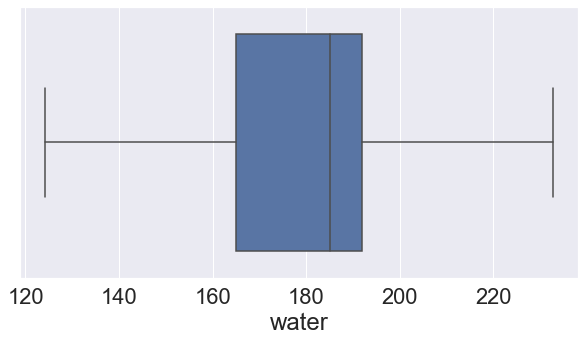

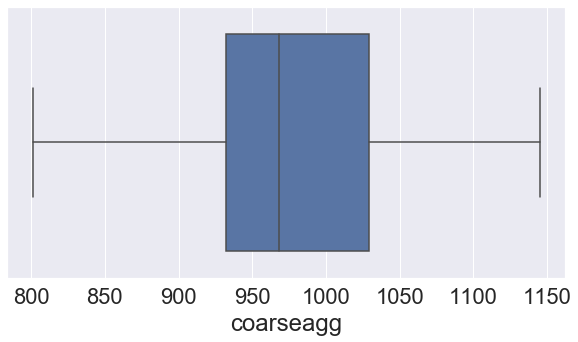

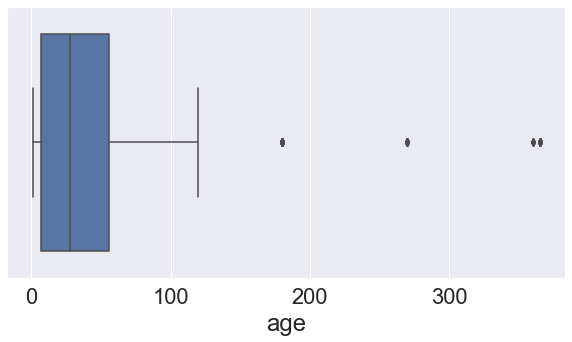

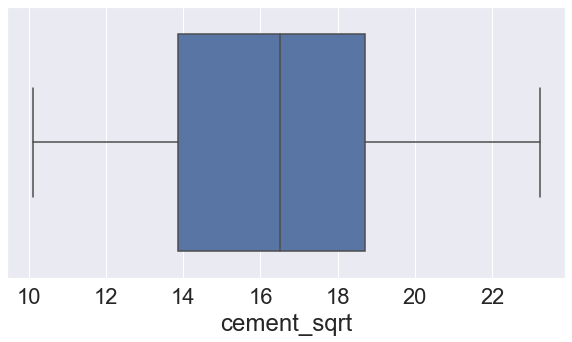

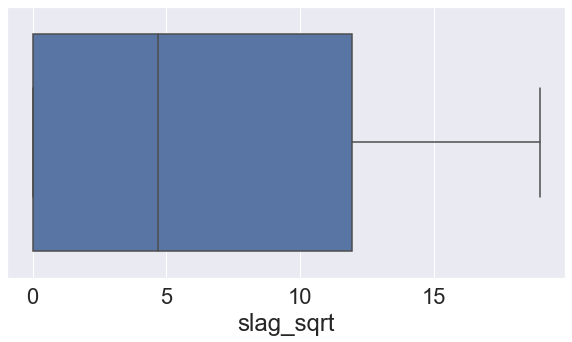

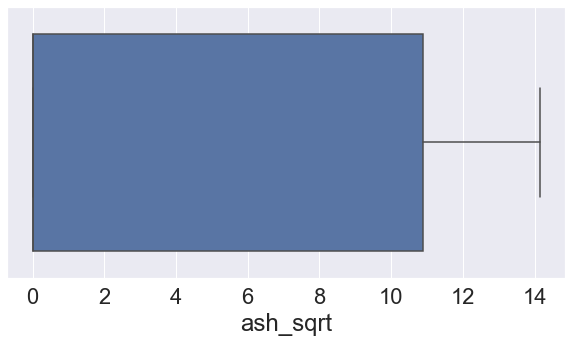

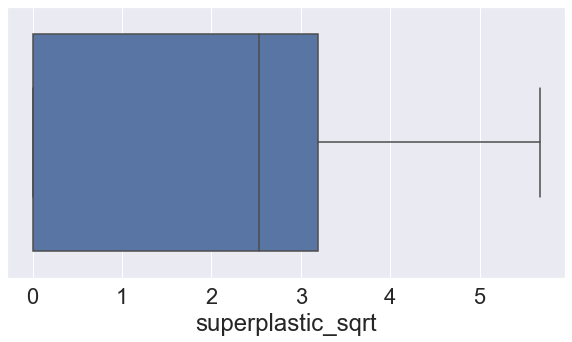

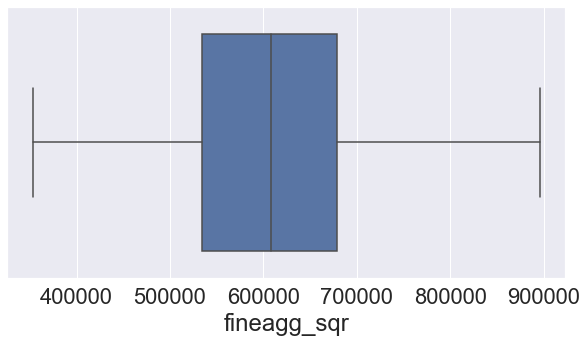

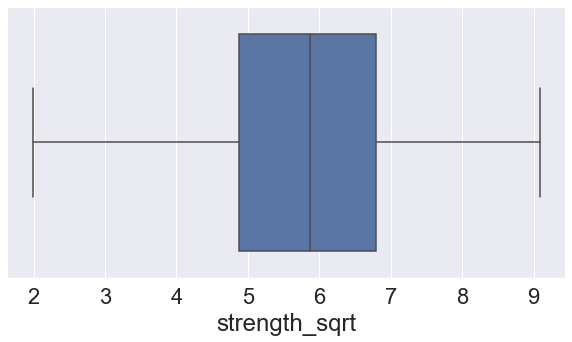

In [28]:
### Boxplot for each individual field and plotting outliers as well
sns.set(style="darkgrid",font_scale=2)

for col_nmm in df_conc_str.columns.values:
    plt.figure(figsize=(10,5))
    sns.boxplot(x = col_nmm, data =  df_conc_str);
    plt.show()

### Keeping the Target Variable as "Continious value"

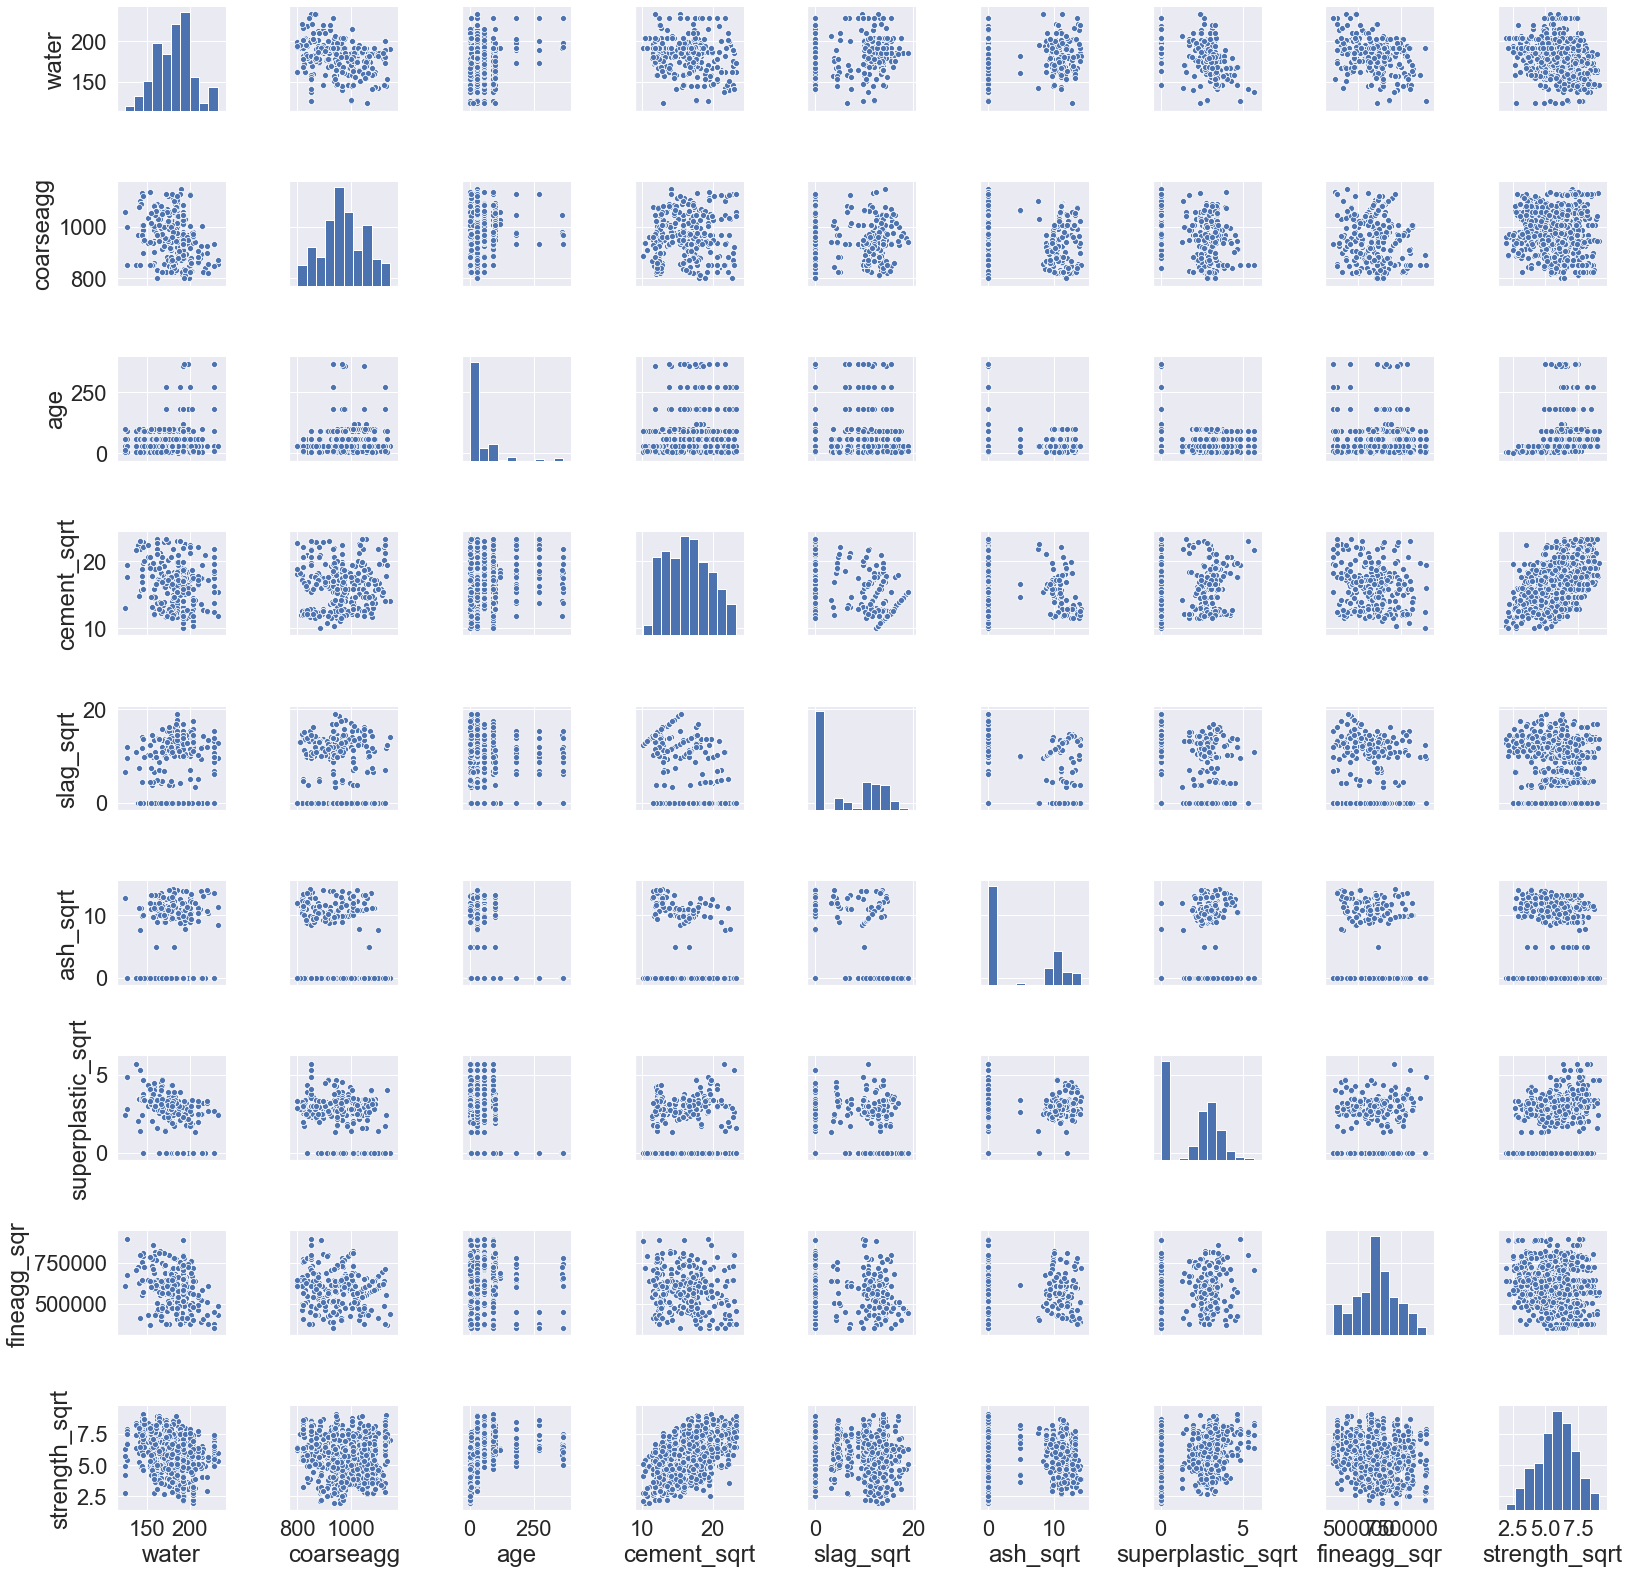

In [29]:
sns.pairplot(df_conc_str)

In [30]:
df_conc_str.corr()

,water,coarseagg,age,cement_sqrt,slag_sqrt,ash_sqrt,superplastic_sqrt,fineagg_sqr,strength_sqrt
water,1.000000,-0.180249,0.279733,-0.080746,0.069625,-0.264537,-0.636530,-0.439453,-0.270131
coarseagg,-0.180249,1.000000,-0.003016,-0.100759,-0.332380,-0.012542,-0.245879,-0.185087,-0.166067
age,0.279733,-0.003016,1.000000,0.086212,-0.036578,-0.161343,-0.229167,-0.143036,0.342859
cement_sqrt,-0.080746,-0.100759,0.086212,1.000000,-0.260352,-0.375399,-0.004707,-0.205594,0.489799
slag_sqrt,0.069625,-0.332380,-0.036578,-0.260352,1.000000,-0.281270,0.088960,-0.265952,0.166002
ash_sqrt,-0.264537,-0.012542,-0.161343,-0.375399,-0.281270,1.000000,0.547754,0.091411,-0.061907
superplastic_sqrt,-0.636530,-0.245879,-0.229167,-0.004707,0.088960,0.547754,1.000000,0.193795,0.347243
fineagg_sqr,-0.439453,-0.185087,-0.143036,-0.205594,-0.265952,0.091411,0.193795,1.000000,-0.182323
strength_sqrt,-0.270131,-0.166067,0.342859,0.489799,0.166002,-0.061907,0.347243,-0.182323,1.000000


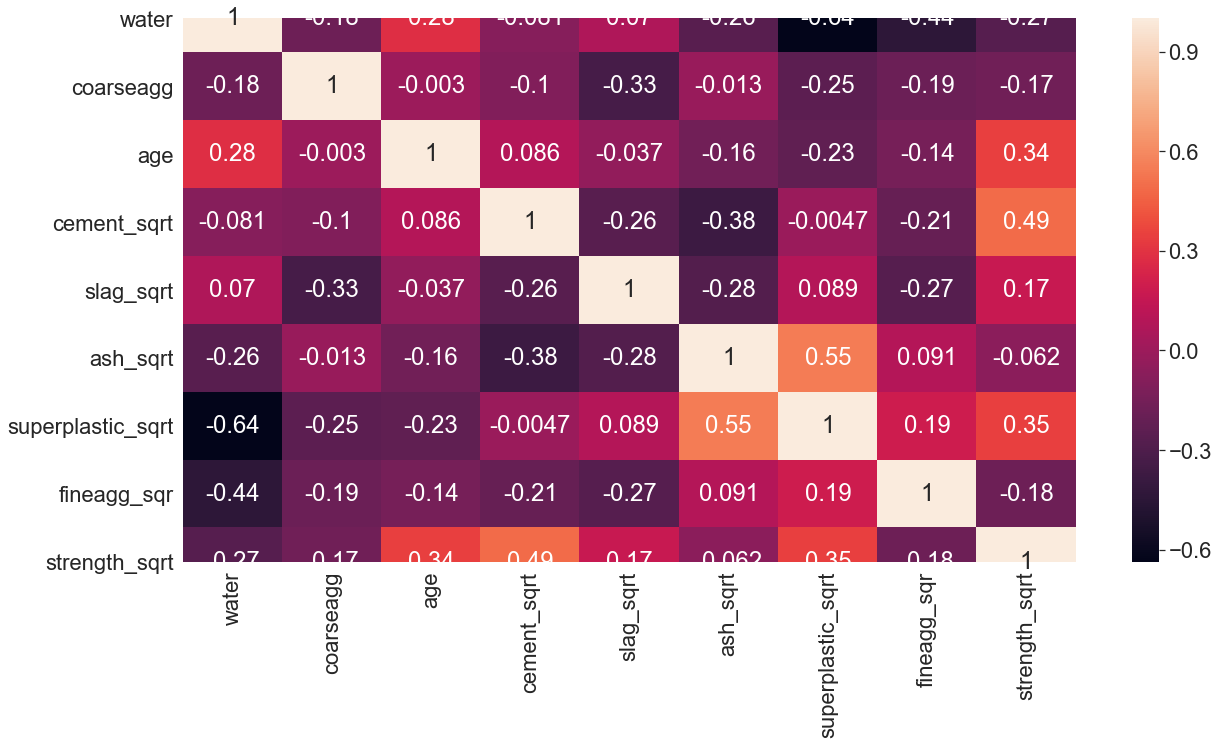

In [31]:
plt.figure(figsize=(20,10))
sns.heatmap(df_conc_str.corr(),annot=True)

### Data Insight 
 
1. Strong negative correlationship between Superplastic and water
2. Strong negative correlationship between Fineagg and water
3. Strong postive correlationship between Superplastic and ash

<Figure size 1440x1440 with 0 Axes>

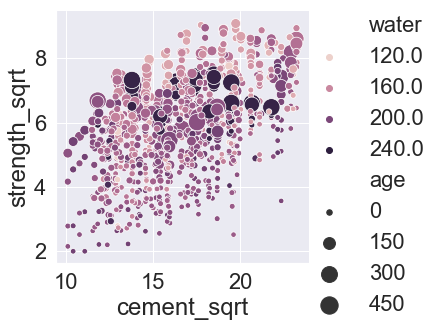

In [32]:
plt.figure(figsize=(20,20))
sns.relplot(y="strength_sqrt",x="cement_sqrt",hue="water",size="age",data=df_conc_str,sizes=(30,300))

<Figure size 720x1440 with 0 Axes>

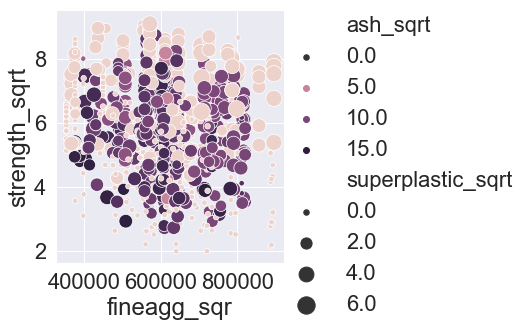

In [33]:
plt.figure(figsize=(10,20))
sns.relplot(y="strength_sqrt",x="fineagg_sqr",hue="ash_sqrt",size="superplastic_sqrt",data=df_conc_str,sizes=(30,300))

<Figure size 720x1440 with 0 Axes>

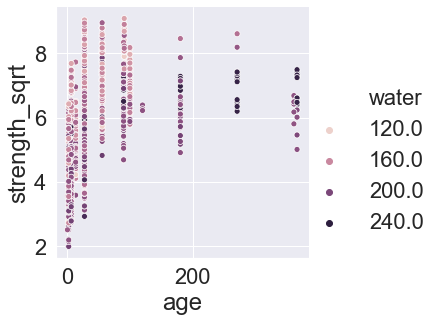

In [34]:
plt.figure(figsize=(10,20))
sns.relplot(y="strength_sqrt",x="age",hue="water",data=df_conc_str,sizes=(30,300))

### Data Insight
Below are the insight that can be drawn from the pairplot, correlation, heatmap and relationship plot 

1. Strength increases as the the amount of cement increases
2. Strength increases with the age
3. Strength increases when less water is used 
4. Cement which are older requires more water for higher strength
5. As the age of the cement increase, it needs more water as looking at the relationship plot between strength vs age


In [35]:
#### This is high coorelation between Superplastic and Water which is around 67% 
#### Also there is coorelation between FineAgg and Water which is around 45%. 
#### So, as of now lets keep Water and drop the fineagg and Water. 

df_con_upd_reg = df_conc_str.copy()
df_con_upd_reg.drop(['superplastic_sqrt','fineagg_sqr'],axis=1,inplace=True)

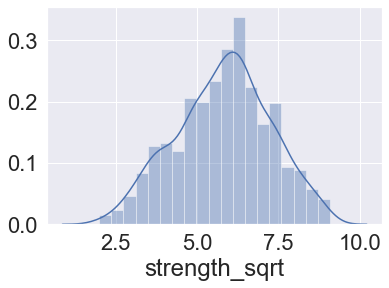

In [36]:
sns.distplot(df_con_upd_reg['strength_sqrt'])

In [37]:
df_con_upd_reg['strength_sqrt'].skew()

-0.1463431063185687

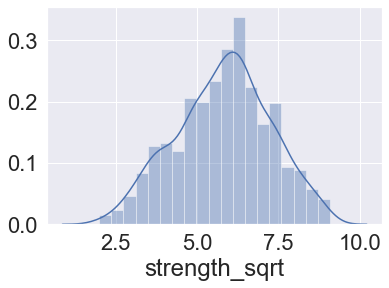

In [38]:
sns.distplot(df_con_upd_reg['strength_sqrt'])

In [39]:
df_con_upd_reg.head()

,water,coarseagg,age,cement_sqrt,slag_sqrt,ash_sqrt,strength_sqrt
0,203.5,971.8,28,11.886968,14.560220,0.000000,5.467175
1,158.3,1080.8,14,12.996153,6.496153,11.148991,4.848711
2,187.4,956.9,28,15.811388,0.000000,9.782638,5.405553
3,228.0,932.0,28,16.309506,10.677078,0.000000,6.771263
4,193.3,1047.4,28,12.441865,13.542526,0.000000,4.276681


In [40]:
X_reg = df_con_upd_reg.loc[:,'water':'ash_sqrt']
Y_reg = df_con_upd_reg.loc[:,'strength_sqrt']

poly = PolynomialFeatures(degree = 2, interaction_only=True)
X_poly = poly.fit_transform(df_con_upd_reg)

X_train_reg,X_test_reg,Y_train_reg,Y_test_reg = train_test_split(X_reg, Y_reg, test_size=0.33, random_state=42)

In [41]:
Linear_reg = LinearRegression()
Ridge_reg  = Ridge()
Lasso_reg  = Lasso()

In [42]:
Linear_reg_out = Linear_reg.fit(X_train_reg,Y_train_reg)
Linear_train_score = Linear_reg_out.score(X_train_reg,Y_train_reg)

In [43]:
Linear_reg_pred_y = Linear_reg.predict(X_test_reg)

In [44]:
Ridge_reg_out = Ridge_reg.fit(X_train_reg,Y_train_reg)
Linear_test_score  = Ridge_reg_out.score(X_train_reg,Y_train_reg)

In [46]:
#df_score = pd.DataFrame(columns=['Model_Type','Model_Name','Train_Score','Test_Score'])
dict_score = {}
dict_score['Linear_Regression'] = {'Type':'Linear_Regression','Train_Score':Linear_train_score,'Test_Score':Linear_test_score}
dict_score

{'Linear_Regression': {'Type': 'Linear_Regression',
  'Train_Score': 0.6330201924918152,
  'Test_Score': 0.633020164290544}}

In [47]:
Lasso_reg_out     = Lasso_reg.fit(X_train_reg,Y_train_reg)
Lasso_train_score = Lasso_reg_out.score(X_train_reg,Y_train_reg)

In [48]:
Ridge_pred_ridge_y = Ridge_reg.predict(X_test_reg)
Ridge_pred_lasso_y = Lasso_reg.predict(X_test_reg) 

In [49]:
lin_reg_mse =  np.sqrt(mean_squared_error(Y_test_reg, Linear_reg_pred_y))
lin_reg_r2 = r2_score(Y_test_reg, Linear_reg_pred_y)

ridge_mse = np.sqrt(mean_squared_error(Y_test_reg, Ridge_pred_ridge_y))
ridge_r2 = r2_score(Y_test_reg, Ridge_pred_ridge_y) 

lasso_mse = np.sqrt(mean_squared_error(Y_test_reg, Ridge_pred_lasso_y))
lasso_r2 = r2_score(Y_test_reg, Ridge_pred_lasso_y)


print("Model\t\t\t\t RMSE \t\t R2") 
print("""LinearRegression\t\t %0.2f \t\t %0.2f"""%(lin_reg_mse,lin_reg_r2)) 
print("""RidgeRegression\t\t\t %0.2f \t\t %0.2f"""%(ridge_mse,ridge_r2))
print("""LassoRegression\t\t\t %0.2f \t\t %0.2f"""%(lasso_mse,lin_reg_r2)) 


Model				 RMSE 		 R2
LinearRegression		 0.94 		 0.56
RidgeRegression			 0.94 		 0.56
LassoRegression			 1.04 		 0.56


In [50]:
ada_regressor = AdaBoostRegressor(random_state=42)

param_distr_ada = { 'n_estimators': [50, 100],'learning_rate':[0.01,0.05,0.1,0.3,1]
                    ,'loss' : ['linear', 'square', 'exponential']}

cv_sets = ShuffleSplit(random_state = 4)
search_ada_reg = RandomizedSearchCV(estimator=ada_regressor
                                    ,param_distributions=param_distr_ada
                                    ,random_state=42
                                    ,cv = cv_sets
                                   )


In [51]:
search_ada_reg.fit(X_train_reg, Y_train_reg)

RandomizedSearchCV(cv=ShuffleSplit(n_splits=10, random_state=4, test_size=None, train_size=None),
                   error_score='raise-deprecating',
                   estimator=AdaBoostRegressor(base_estimator=None,
                                               learning_rate=1.0, loss='linear',
                                               n_estimators=50,
                                               random_state=42),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 100]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [52]:
search_ada_reg.best_params_

{'n_estimators': 100, 'loss': 'square', 'learning_rate': 1}

In [53]:
ada_reg_train_score = search_ada_reg.score(X_train_reg,Y_train_reg)

In [54]:
ada_reg_test_score = search_ada_reg.score(X_test_reg,Y_test_reg)

In [56]:
dict_score['Adaptive_Regression'] = {'Type':'Adaptive_Regression','Train_Score':ada_reg_train_score,'Test_Score':ada_reg_test_score}
dict_score

{'Linear_Regression': {'Type': 'Linear_Regression',
  'Train_Score': 0.6330201924918152,
  'Test_Score': 0.633020164290544},
 'Adaptive_Regression': {'Type': 'Adaptive_Regression',
  'Train_Score': 0.8596351595910188,
  'Test_Score': 0.8322851910842243}}

In [57]:
### GradientBoostingRegressor
grad_boost_reg = GradientBoostingRegressor()

params_GB_RS_reg = {"max_depth":randint(3,7),"max_features":['auto', 'sqrt', 'log2'],"min_samples_split": randint(2,10),
              "min_samples_leaf": randint(1,10),'learning_rate':uniform(0.05,0.2),'n_estimators':randint(10,70)}


Grad_RS_reg = RandomizedSearchCV(grad_boost_reg, param_distributions=params_GB_RS_reg,n_iter=100)
Grad_RS_reg.fit(X_train_reg,Y_train_reg)


C:\Users\a888915\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                       

In [58]:
Grad_RS_reg.best_params_

{'learning_rate': 0.18998230749183498,
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_leaf': 8,
 'min_samples_split': 3,
 'n_estimators': 52}

In [59]:
Grad_RS_reg_train = Grad_RS_reg.score(X_train_reg,Y_train_reg)

In [60]:
Grad_RS_reg.fit(X_test_reg,Y_test_reg)

C:\Users\a888915\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                       

In [61]:
Grad_RS_reg_test = Grad_RS_reg.score(X_test_reg,Y_test_reg)

In [62]:
dict_score['Gradient_Regression'] = {'Type':'Gradient_Regression','Train_Score':Grad_RS_reg_train,'Test_Score':Grad_RS_reg_test}
dict_score

{'Linear_Regression': {'Type': 'Linear_Regression',
  'Train_Score': 0.6330201924918152,
  'Test_Score': 0.633020164290544},
 'Adaptive_Regression': {'Type': 'Adaptive_Regression',
  'Train_Score': 0.8596351595910188,
  'Test_Score': 0.8322851910842243},
 'Gradient_Regression': {'Type': 'Gradient_Regression',
  'Train_Score': 0.9788958178542996,
  'Test_Score': 0.9755412142536845}}

In [63]:
xgb_reg = XGBRegressor(objective='reg:squarederror')
params_xgb_RS_reg = {"max_depth":randint(3,8),"min_child_weight" :randint(5,8),'learning_rate':uniform(0.05,0.2),
                 'n_estimators':randint (10,70)}


xgb_RS_reg = RandomizedSearchCV(xgb_reg, param_distributions=params_xgb_RS_reg,n_iter=100,)
xgb_RS_reg.fit(X_train_reg,Y_train_reg)

C:\Users\a888915\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\a888915\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\a888915\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\a888915\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\a888915\AppData\Local\Continuum\anaconda3\lib\

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:squarederror...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DAE7CE5C88>,
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_froze

In [64]:
xgb_RS_reg.best_params_

{'learning_rate': 0.1211625179519394,
 'max_depth': 7,
 'min_child_weight': 7,
 'n_estimators': 67}

In [65]:
xgb_RS_reg_train = xgb_RS_reg.score(X_train_reg,Y_train_reg)

In [66]:
xgb_RS_reg_test = xgb_RS_reg.score(X_test_reg,Y_test_reg)

In [67]:
dict_score['XGB_Regression'] = {'Type':'XGB_Regression','Train_Score':xgb_RS_reg_train,'Test_Score':xgb_RS_reg_test}
dict_score

{'Linear_Regression': {'Type': 'Linear_Regression',
  'Train_Score': 0.6330201924918152,
  'Test_Score': 0.633020164290544},
 'Adaptive_Regression': {'Type': 'Adaptive_Regression',
  'Train_Score': 0.8596351595910188,
  'Test_Score': 0.8322851910842243},
 'Gradient_Regression': {'Type': 'Gradient_Regression',
  'Train_Score': 0.9788958178542996,
  'Test_Score': 0.9755412142536845},
 'XGB_Regression': {'Type': 'XGB_Regression',
  'Train_Score': 0.9804194860379405,
  'Test_Score': 0.9225446203651201}}

In [68]:
### Bagging regressor
bag_reg = BaggingRegressor()
params_bag_reg =  {"n_estimators": randint(50,200),"max_features":randint(1,6),"max_samples": uniform(0.5,0.1)
                   ,"bootstrap": [True, False],"bootstrap_features": [True, False]}


Bag_RS_reg = RandomizedSearchCV(bag_reg, param_distributions=params_bag_reg,n_iter=120)
Bag_RS_reg.fit(X_train_reg,Y_train_reg)

C:\Users\a888915\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=BaggingRegressor(base_estimator=None,
                                              bootstrap=True,
                                              bootstrap_features=False,
                                              max_features=1.0, max_samples=1.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
                   iid='warn', n_iter=120, n_jobs=None,
                   param_distributions={'bootstrap': [True, False]...
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DAEA6B0848>,
                                        'max_samples': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000

In [69]:
Bag_RS_reg.best_params_

{'bootstrap': False,
 'bootstrap_features': False,
 'max_features': 5,
 'max_samples': 0.5946845227954632,
 'n_estimators': 135}

In [70]:
Bag_RS_reg_train = Bag_RS_reg.score(X_train_reg,Y_train_reg)

In [71]:
Bag_RS_reg_test = Bag_RS_reg.score(X_test_reg,Y_test_reg)

In [72]:
pred_Bag_RS_reg = Bag_RS_reg.predict(X_test_reg)
r2_score(Y_test_reg,pred_Bag_RS_reg)

0.8941925661657834

In [73]:
dict_score['Bagging_Regression'] = {'Type':'Bagging_Regression','Train_Score':Bag_RS_reg_train,'Test_Score':Bag_RS_reg_test}
dict_score

{'Linear_Regression': {'Type': 'Linear_Regression',
  'Train_Score': 0.6330201924918152,
  'Test_Score': 0.633020164290544},
 'Adaptive_Regression': {'Type': 'Adaptive_Regression',
  'Train_Score': 0.8596351595910188,
  'Test_Score': 0.8322851910842243},
 'Gradient_Regression': {'Type': 'Gradient_Regression',
  'Train_Score': 0.9788958178542996,
  'Test_Score': 0.9755412142536845},
 'XGB_Regression': {'Type': 'XGB_Regression',
  'Train_Score': 0.9804194860379405,
  'Test_Score': 0.9225446203651201},
 'Bagging_Regression': {'Type': 'Bagging_Regression',
  'Train_Score': 0.9716248083422236,
  'Test_Score': 0.8941925661657834}}

### Converting Target Variable as "Classfier"

In [74]:
##### Changing the target variable into categorical and then predicting it. 
strength_lbl = ['LOW_GRADE','STANDARD_GRADE','HIGH_GRADE']
strength_bins = [0, 4.5, 7, 10]

df_con = df_conc_str.copy()

df_con['strength_grade'] = pd.cut(df_conc_str['strength_sqrt'], bins = strength_bins,labels = strength_lbl)
df_con.drop('strength_sqrt',axis=1,inplace=True)
df_con.head()

,water,coarseagg,age,cement_sqrt,slag_sqrt,ash_sqrt,superplastic_sqrt,fineagg_sqr,strength_grade
0,203.5,971.8,28,11.886968,14.560220,0.000000,0.000000,560252.25,STANDARD_GRADE
1,158.3,1080.8,14,12.996153,6.496153,11.148991,3.286335,633934.44,STANDARD_GRADE
2,187.4,956.9,28,15.811388,0.000000,9.782638,2.345208,741665.44,STANDARD_GRADE
3,228.0,932.0,28,16.309506,10.677078,0.000000,0.000000,448900.00,STANDARD_GRADE
4,193.3,1047.4,28,12.441865,13.542526,0.000000,3.016621,485390.89,LOW_GRADE


In [75]:
df_con.groupby('strength_grade').size()

strength_grade
LOW_GRADE         198
STANDARD_GRADE    611
HIGH_GRADE        221
dtype: int64

In [76]:
df_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
water                1030 non-null float64
coarseagg            1030 non-null float64
age                  1030 non-null int64
cement_sqrt          1030 non-null float64
slag_sqrt            1030 non-null float64
ash_sqrt             1030 non-null float64
superplastic_sqrt    1030 non-null float64
fineagg_sqr          1030 non-null float64
strength_grade       1030 non-null category
dtypes: category(1), float64(7), int64(1)
memory usage: 65.6 KB


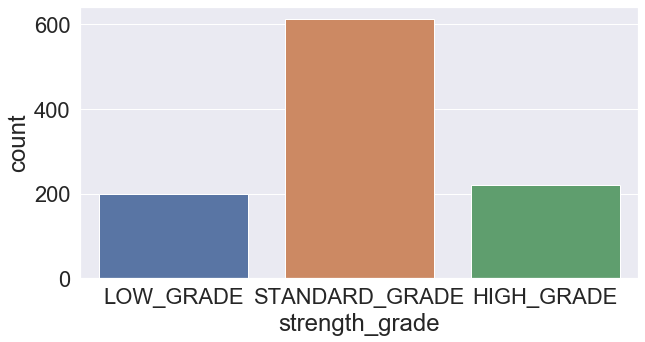

In [77]:
#Mapping target variable
plt.figure(figsize = (10,5))
sns.countplot(x='strength_grade', data=df_con)

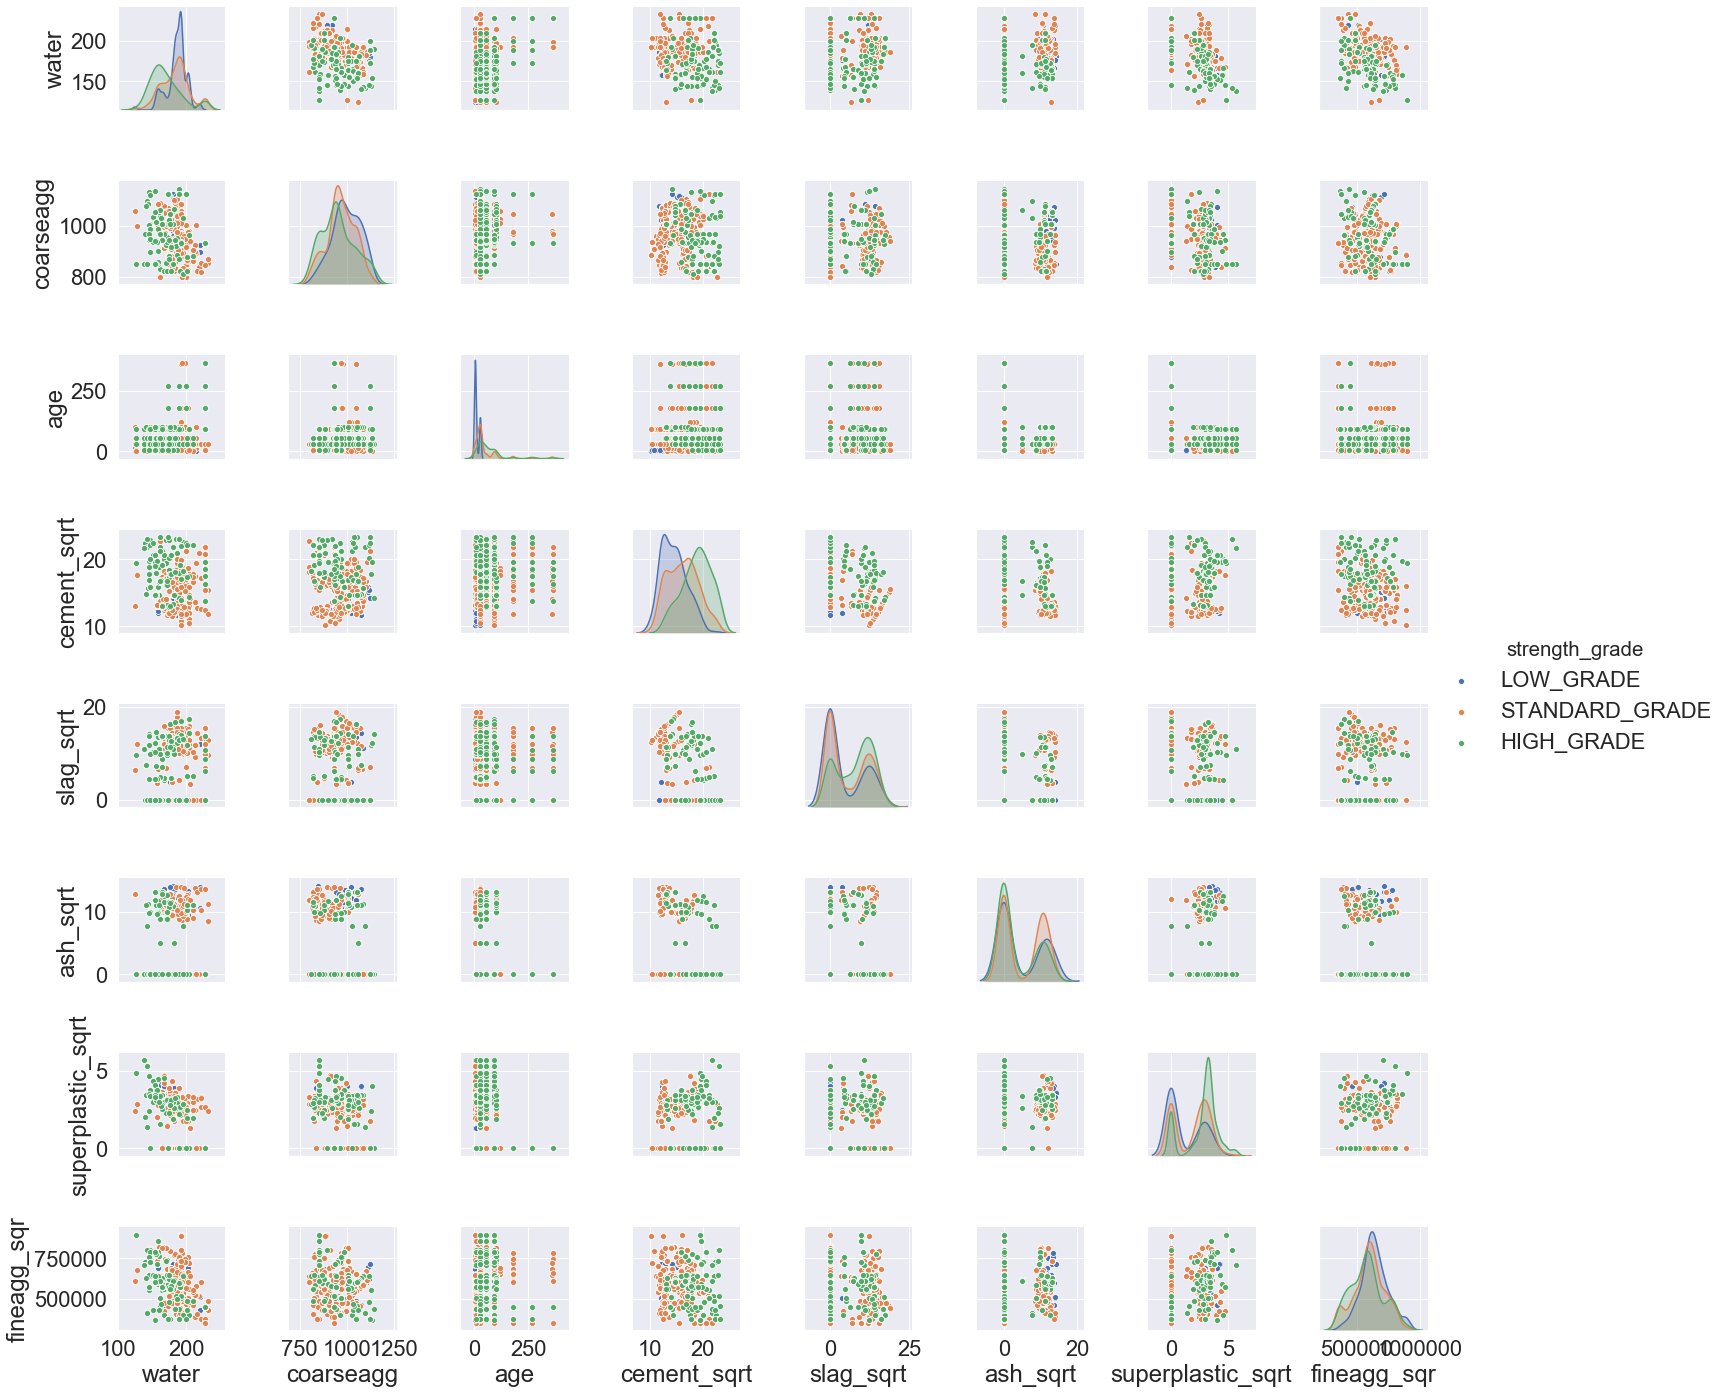

In [78]:
sns.pairplot(df_con,hue='strength_grade')

In [79]:
df_con.corr()

,water,coarseagg,age,cement_sqrt,slag_sqrt,ash_sqrt,superplastic_sqrt,fineagg_sqr
water,1.000000,-0.180249,0.279733,-0.080746,0.069625,-0.264537,-0.636530,-0.439453
coarseagg,-0.180249,1.000000,-0.003016,-0.100759,-0.332380,-0.012542,-0.245879,-0.185087
age,0.279733,-0.003016,1.000000,0.086212,-0.036578,-0.161343,-0.229167,-0.143036
cement_sqrt,-0.080746,-0.100759,0.086212,1.000000,-0.260352,-0.375399,-0.004707,-0.205594
slag_sqrt,0.069625,-0.332380,-0.036578,-0.260352,1.000000,-0.281270,0.088960,-0.265952
ash_sqrt,-0.264537,-0.012542,-0.161343,-0.375399,-0.281270,1.000000,0.547754,0.091411
superplastic_sqrt,-0.636530,-0.245879,-0.229167,-0.004707,0.088960,0.547754,1.000000,0.193795
fineagg_sqr,-0.439453,-0.185087,-0.143036,-0.205594,-0.265952,0.091411,0.193795,1.000000


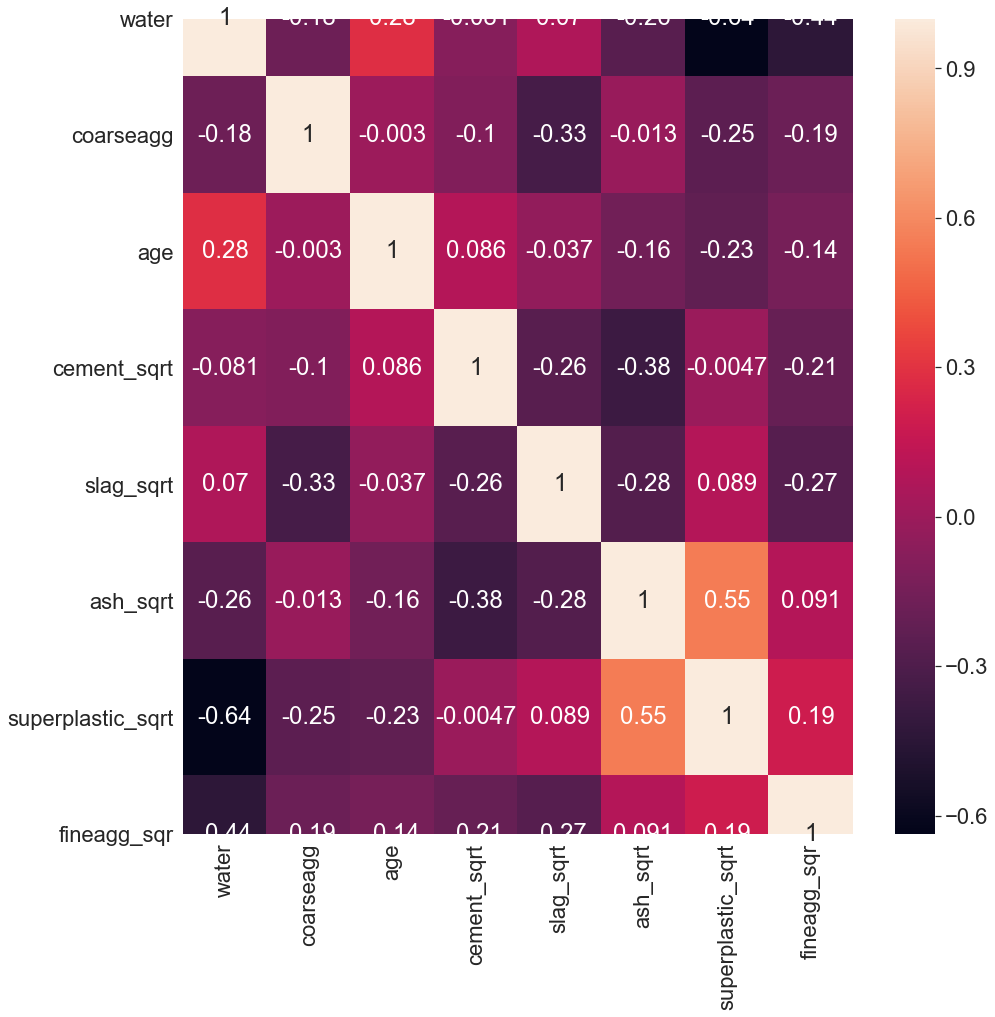

In [80]:
plt.figure(figsize=(15,15))
sns.heatmap(df_con.corr(),annot=True)

In [81]:
#### This is high coorelation between Superplastic and Water which is around 67% 
#### Also there is coorelation between FineAgg and Water which is around 45%. 
#### So, as of now lets keep Water and drop the fineagg and Water. 

df_con_upd = df_con.copy()

In [82]:
df_con_upd.drop(['superplastic_sqrt','fineagg_sqr'],axis=1,inplace=True)

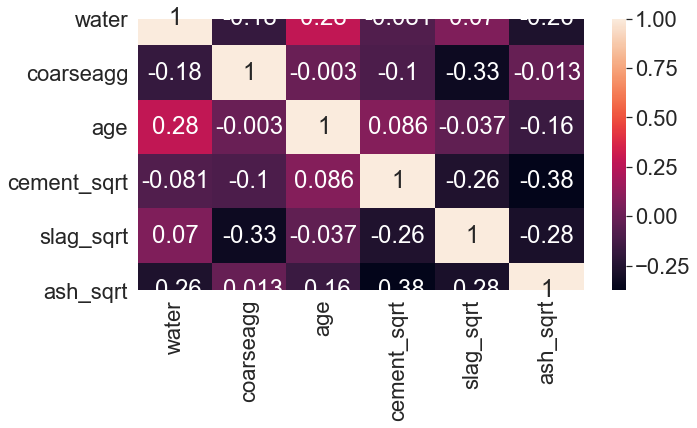

In [83]:
plt.figure(figsize=(10,5))
sns.heatmap(df_con_upd.corr(),annot=True)

In [84]:
df_con_upd.head()

,water,coarseagg,age,cement_sqrt,slag_sqrt,ash_sqrt,strength_grade
0,203.5,971.8,28,11.886968,14.560220,0.000000,STANDARD_GRADE
1,158.3,1080.8,14,12.996153,6.496153,11.148991,STANDARD_GRADE
2,187.4,956.9,28,15.811388,0.000000,9.782638,STANDARD_GRADE
3,228.0,932.0,28,16.309506,10.677078,0.000000,STANDARD_GRADE
4,193.3,1047.4,28,12.441865,13.542526,0.000000,LOW_GRADE


In [85]:
X = df_con_upd.loc[:,'water':'ash_sqrt']
Y = df_con_upd.loc[:,'strength_grade']
X_train,X_Test,Y_train,Y_Test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [86]:
X_train.head()

,water,coarseagg,age,cement_sqrt,slag_sqrt,ash_sqrt
900,198.0,968.0,180,15.937377,0.000000,0.000000
370,228.0,932.0,180,16.309506,10.677078,0.000000
604,164.9,944.7,56,19.042059,13.747727,0.000000
973,210.0,882.0,3,22.158520,5.099020,11.090537
593,168.0,822.0,56,20.591260,4.690416,11.489125


In [87]:
dTreeC = DecisionTreeClassifier(max_depth=4)
mdl_dTreeC = dTreeC.fit(X_train,Y_train)

In [88]:
mdl_dTreeC

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

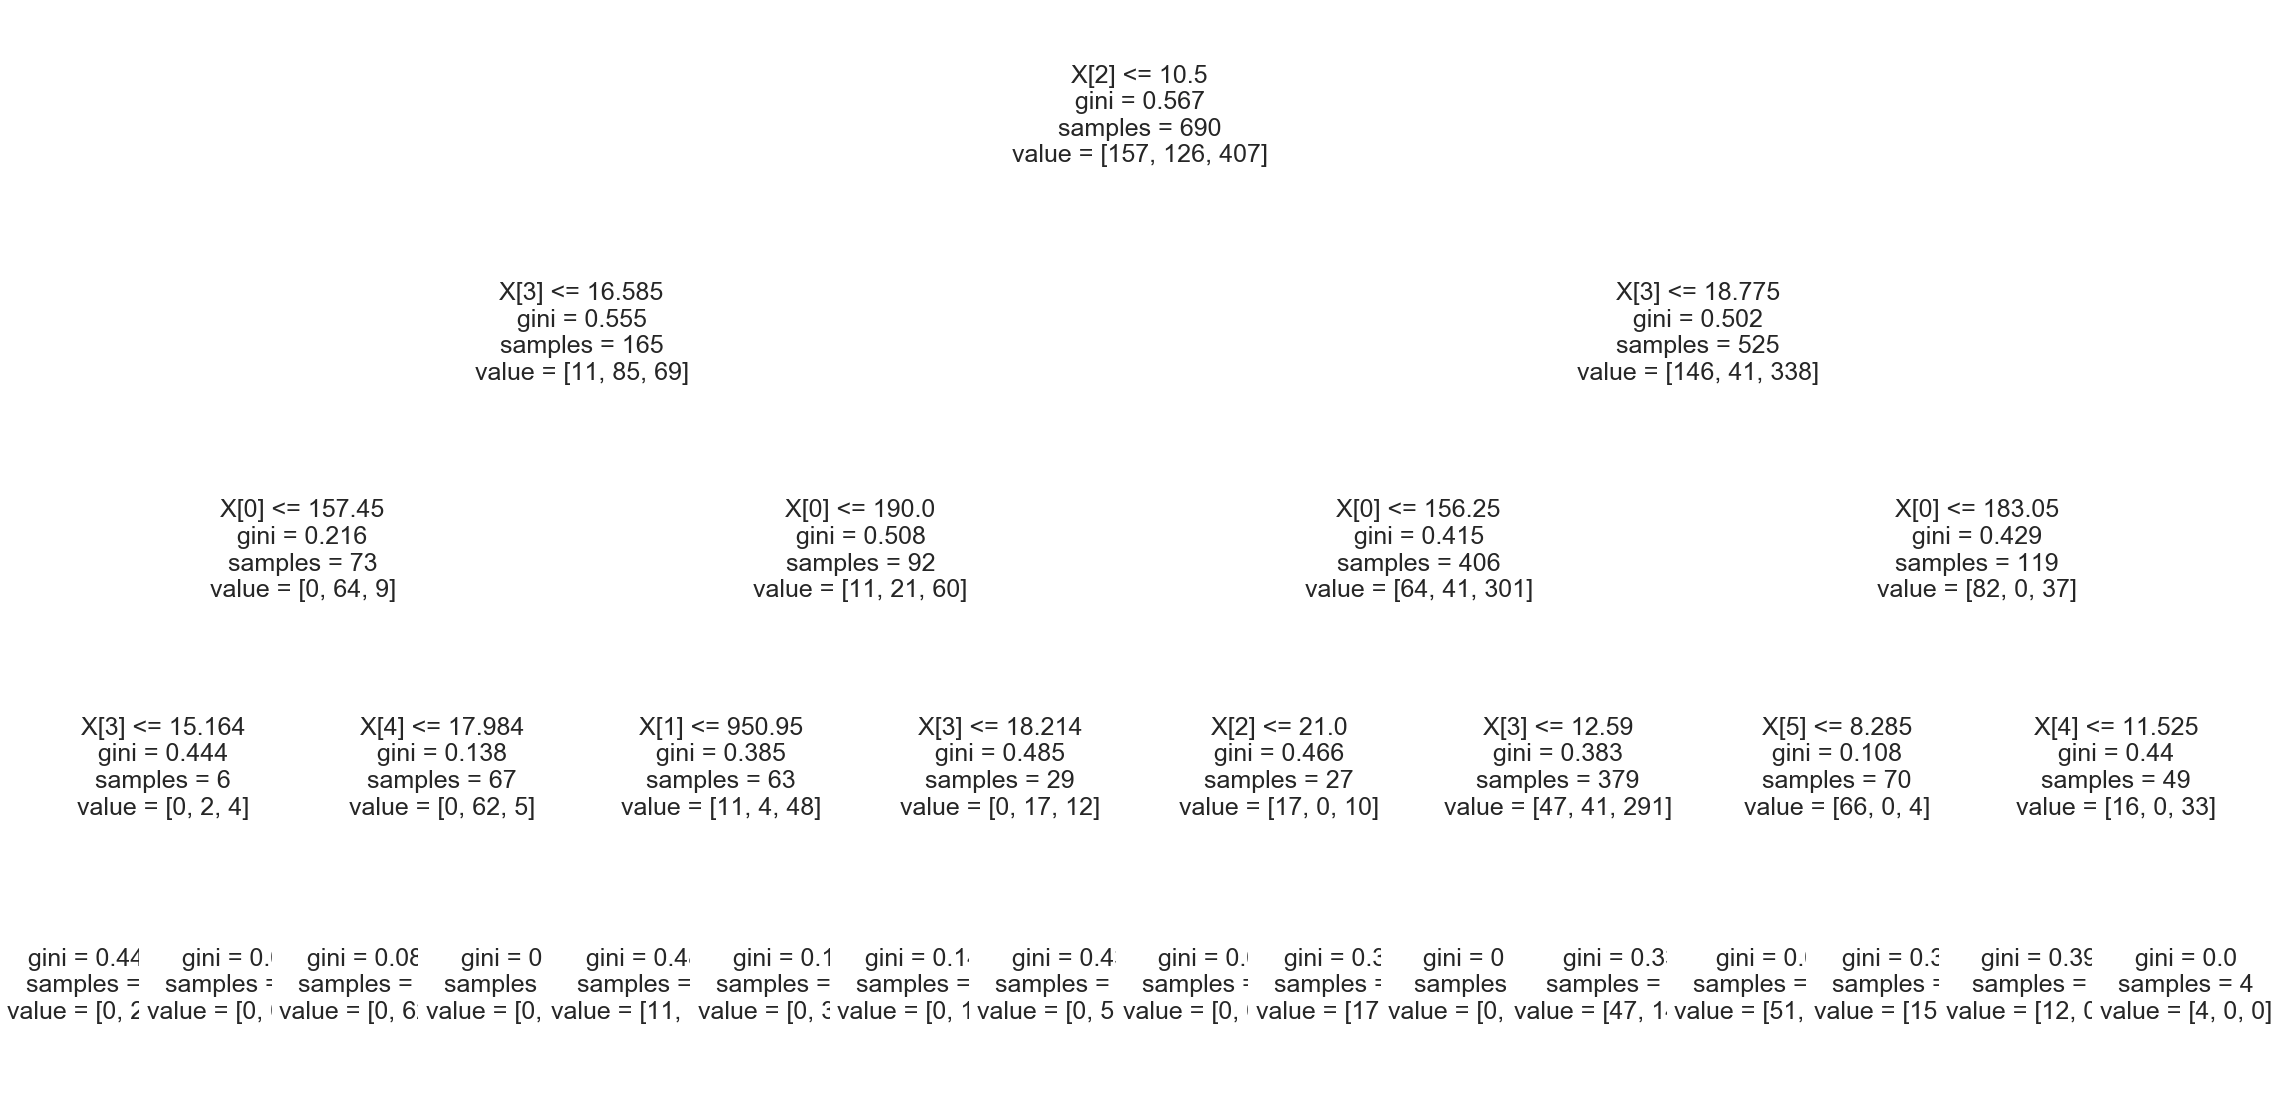

In [89]:
#Plot the tree 
plt.figure(figsize=(40,20))
from sklearn.tree import plot_tree
plot_tree(mdl_dTreeC,fontsize=25,max_depth = 4);
 

In [90]:
mdl_dTreeC

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [91]:
dot_data = export_graphviz(mdl_dTreeC, out_file=None)
graph = graphviz.Source(dot_data);
graph.render("mdl_tree")

'mdl_tree.pdf'

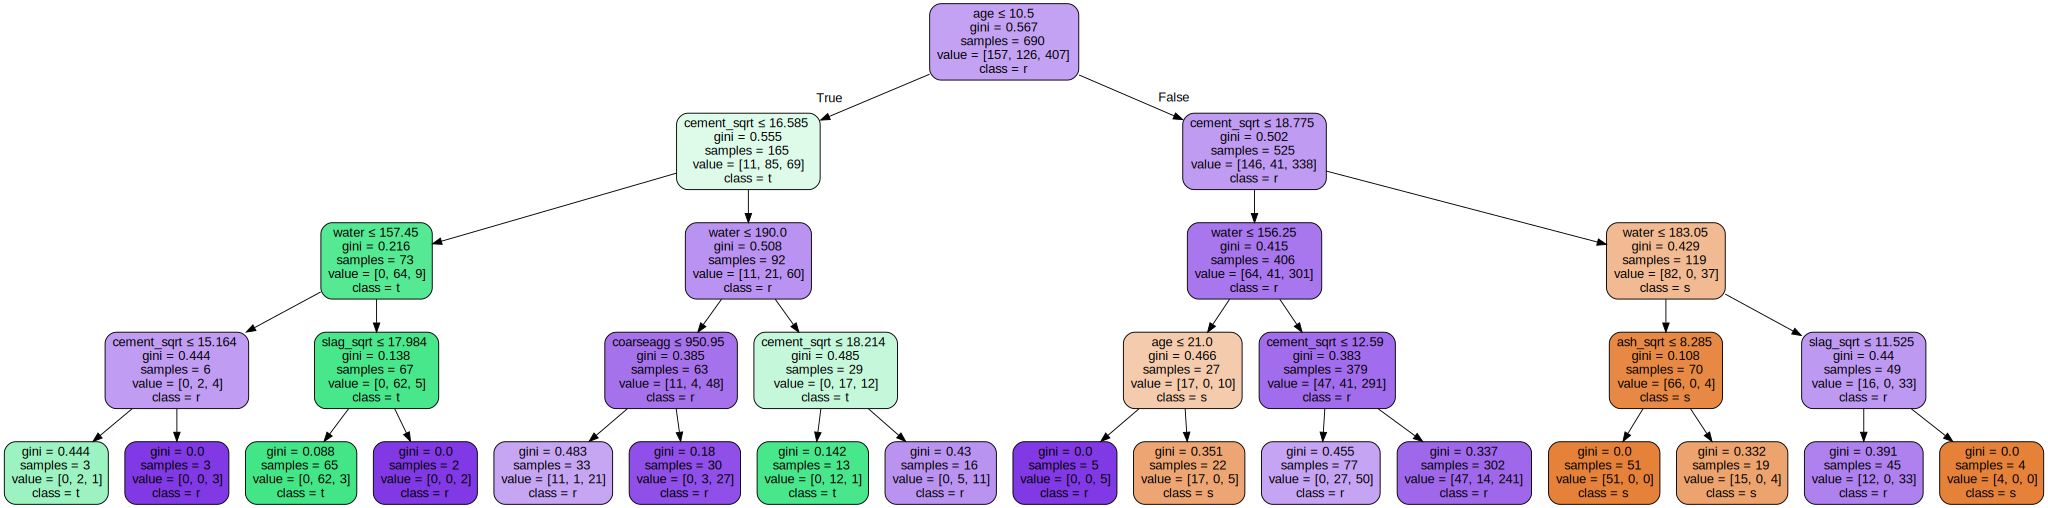

In [92]:
feature_names = X_train.columns.values
target_names = Y_train.name

dot_data = export_graphviz(mdl_dTreeC,feature_names=feature_names,class_names=target_names, out_file=None,filled=True, rounded=True,special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

### Random Forest Classifier

In [93]:
param_distributions = {'n_estimators': randint(1, 5),'max_depth': randint(5, 10),'criterion':('gini','entropy')}
search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=40)
                            ,n_iter=5
                            ,param_distributions=param_distributions
                            ,random_state=40)

search.fit(X_train, Y_train)


C:\Users\a888915\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\a888915\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs

In [94]:
Random_Forest_train = search.score(X_train,Y_train)

In [95]:
search.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 4}

In [96]:
Random_Forest_test = search.score(X_Test,Y_Test)

In [97]:
dict_score['RandomForest_Classifier'] = {'Type':'RandomForest_Classifier','Train_Score':Random_Forest_train,'Test_Score':Random_Forest_test}
dict_score

{'Linear_Regression': {'Type': 'Linear_Regression',
  'Train_Score': 0.6330201924918152,
  'Test_Score': 0.633020164290544},
 'Adaptive_Regression': {'Type': 'Adaptive_Regression',
  'Train_Score': 0.8596351595910188,
  'Test_Score': 0.8322851910842243},
 'Gradient_Regression': {'Type': 'Gradient_Regression',
  'Train_Score': 0.9788958178542996,
  'Test_Score': 0.9755412142536845},
 'XGB_Regression': {'Type': 'XGB_Regression',
  'Train_Score': 0.9804194860379405,
  'Test_Score': 0.9225446203651201},
 'Bagging_Regression': {'Type': 'Bagging_Regression',
  'Train_Score': 0.9716248083422236,
  'Test_Score': 0.8941925661657834},
 'RandomForest_Classifier': {'Type': 'RandomForest_Classifier',
  'Train_Score': 0.9130434782608695,
  'Test_Score': 0.8441176470588235}}

### Adaptive Boosting Classfier

In [98]:
ada_classifier = AdaBoostClassifier(random_state=42)
cv_sets = ShuffleSplit(random_state = 4)
param_distr_ada = {'n_estimators':[500, 1000, 1500, 2000],'learning_rate':[0.05, 0.1, 0.15, 0.2]}
scorer = make_scorer(f1_score,average = 'macro')

search_ada = RandomizedSearchCV(estimator=ada_classifier
                            ,param_distributions=param_distr_ada
                            ,random_state=42
                            ,scoring = scorer
                            ,cv = cv_sets
                            )

#search_ada.fit(X_train, Y_train)

In [99]:
search_ada.fit(X_train, Y_train)

RandomizedSearchCV(cv=ShuffleSplit(n_splits=10, random_state=4, test_size=None, train_size=None),
                   error_score='raise-deprecating',
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=50,
                                                random_state=42),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'n_estimators': [500, 1000, 1500,
                                                         2000]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False,
                   scoring=make_scorer(f1_score, average=macro), verbose=0)

In [100]:
search_ada.best_params_

{'n_estimators': 2000, 'learning_rate': 0.2}

In [101]:
Ada_class_train = search_ada.score(X_train,Y_train)

In [102]:
Ada_class_test = search_ada.score(X_Test,Y_Test)

In [103]:
dict_score['Adaptive_Boosting_Classifier'] = {'Type':'Adaptive_Boosting_Classifier','Train_Score':Ada_class_train,'Test_Score':Ada_class_test}
dict_score

{'Linear_Regression': {'Type': 'Linear_Regression',
  'Train_Score': 0.6330201924918152,
  'Test_Score': 0.633020164290544},
 'Adaptive_Regression': {'Type': 'Adaptive_Regression',
  'Train_Score': 0.8596351595910188,
  'Test_Score': 0.8322851910842243},
 'Gradient_Regression': {'Type': 'Gradient_Regression',
  'Train_Score': 0.9788958178542996,
  'Test_Score': 0.9755412142536845},
 'XGB_Regression': {'Type': 'XGB_Regression',
  'Train_Score': 0.9804194860379405,
  'Test_Score': 0.9225446203651201},
 'Bagging_Regression': {'Type': 'Bagging_Regression',
  'Train_Score': 0.9716248083422236,
  'Test_Score': 0.8941925661657834},
 'RandomForest_Classifier': {'Type': 'RandomForest_Classifier',
  'Train_Score': 0.9130434782608695,
  'Test_Score': 0.8441176470588235},
 'Adaptive_Boosting_Classifier': {'Type': 'Adaptive_Boosting_Classifier',
  'Train_Score': 0.8075927539222354,
  'Test_Score': 0.7642574131935834}}

### Gradient Boosting Classfier

In [104]:
grad_boost = GradientBoostingClassifier()

params_GB_RS = {"max_depth":randint(3,7),"max_features":['auto', 'sqrt', 'log2'],"min_samples_split": randint(2,10),
              "min_samples_leaf": randint(1,10),'learning_rate':uniform(0.05,0.2),'n_estimators':randint(10,70)}


Grad_RS = RandomizedSearchCV(grad_boost, param_distributions=params_GB_RS,n_iter=100)
Grad_RS.fit(X_train,Y_train)


C:\Users\a888915\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                

In [105]:
Grad_RS.best_params_

{'learning_rate': 0.0631477917865089,
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 67}

In [106]:
Gradient_Boosting_Train = Grad_RS.score(X_train,Y_train)

In [108]:
Gradient_Boosting_Test = Grad_RS.score(X_Test,Y_Test)

In [109]:
pred_Grad_RS = Grad_RS.predict(X_Test)
accuracy_score(Y_Test,pred_Grad_RS)

0.8911764705882353

In [110]:
dict_score['Gradient_Boosting_Classifier'] = {'Type':'Gradient_Boosting_Classifier','Train_Score':Gradient_Boosting_Train,'Test_Score':Gradient_Boosting_Test}
dict_score

{'Linear_Regression': {'Type': 'Linear_Regression',
  'Train_Score': 0.6330201924918152,
  'Test_Score': 0.633020164290544},
 'Adaptive_Regression': {'Type': 'Adaptive_Regression',
  'Train_Score': 0.8596351595910188,
  'Test_Score': 0.8322851910842243},
 'Gradient_Regression': {'Type': 'Gradient_Regression',
  'Train_Score': 0.9788958178542996,
  'Test_Score': 0.9755412142536845},
 'XGB_Regression': {'Type': 'XGB_Regression',
  'Train_Score': 0.9804194860379405,
  'Test_Score': 0.9225446203651201},
 'Bagging_Regression': {'Type': 'Bagging_Regression',
  'Train_Score': 0.9716248083422236,
  'Test_Score': 0.8941925661657834},
 'RandomForest_Classifier': {'Type': 'RandomForest_Classifier',
  'Train_Score': 0.9130434782608695,
  'Test_Score': 0.8441176470588235},
 'Adaptive_Boosting_Classifier': {'Type': 'Adaptive_Boosting_Classifier',
  'Train_Score': 0.8075927539222354,
  'Test_Score': 0.7642574131935834},
 'Gradient_Boosting_Classifier': {'Type': 'Gradient_Boosting_Classifier',
  'Trai

### XG Boosting Classifier

In [111]:
xgb_boost = XGBClassifier()

In [112]:
params_xgb_RS = {"max_depth":randint(3,8),"min_child_weight" :randint(5,8),'learning_rate':uniform(0.05,0.2),
                 'n_estimators':randint (10,70)}


xgb_RS = RandomizedSearchCV(XGBClassifier(), param_distributions=params_xgb_RS,n_iter=100)
xgb_RS.fit(X_train,Y_train)

C:\Users\a888915\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_al...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DAECF59E88>,
                                        'min_child_weight': <scipy.stats._distn_infrastructur

In [113]:
xgb_RS.best_params_

{'learning_rate': 0.2178068512541595,
 'max_depth': 6,
 'min_child_weight': 7,
 'n_estimators': 58}

In [114]:
xgb_RS_train = xgb_RS.score(X_train,Y_train)

In [116]:
xgb_RS_test = xgb_RS.score(X_Test,Y_Test)

In [117]:
train_xgb_RS = xgb_RS.predict(X_train)
accuracy_score(Y_train,train_xgb_RS)

0.9739130434782609

In [118]:
pred_xgb_RS = xgb_RS.predict(X_Test)
accuracy_score(Y_Test,pred_xgb_RS)

0.888235294117647

In [119]:
dict_score['XG_Boosting_Classifier'] = {'Type':'XG_Boosting_Classifier','Train_Score':xgb_RS_train,'Test_Score':xgb_RS_test}
dict_score

{'Linear_Regression': {'Type': 'Linear_Regression',
  'Train_Score': 0.6330201924918152,
  'Test_Score': 0.633020164290544},
 'Adaptive_Regression': {'Type': 'Adaptive_Regression',
  'Train_Score': 0.8596351595910188,
  'Test_Score': 0.8322851910842243},
 'Gradient_Regression': {'Type': 'Gradient_Regression',
  'Train_Score': 0.9788958178542996,
  'Test_Score': 0.9755412142536845},
 'XGB_Regression': {'Type': 'XGB_Regression',
  'Train_Score': 0.9804194860379405,
  'Test_Score': 0.9225446203651201},
 'Bagging_Regression': {'Type': 'Bagging_Regression',
  'Train_Score': 0.9716248083422236,
  'Test_Score': 0.8941925661657834},
 'RandomForest_Classifier': {'Type': 'RandomForest_Classifier',
  'Train_Score': 0.9130434782608695,
  'Test_Score': 0.8441176470588235},
 'Adaptive_Boosting_Classifier': {'Type': 'Adaptive_Boosting_Classifier',
  'Train_Score': 0.8075927539222354,
  'Test_Score': 0.7642574131935834},
 'Gradient_Boosting_Classifier': {'Type': 'Gradient_Boosting_Classifier',
  'Trai

In [121]:
df_strength_score = pd.DataFrame(dict_score).T
df_strength_score

,Type,Train_Score,Test_Score
Linear_Regression,Linear_Regression,0.63302,0.63302
Adaptive_Regression,Adaptive_Regression,0.859635,0.832285
Gradient_Regression,Gradient_Regression,0.978896,0.975541
XGB_Regression,XGB_Regression,0.980419,0.922545
Bagging_Regression,Bagging_Regression,0.971625,0.894193
RandomForest_Classifier,RandomForest_Classifier,0.913043,0.844118
Adaptive_Boosting_Classifier,Adaptive_Boosting_Classifier,0.807593,0.764257
Gradient_Boosting_Classifier,Gradient_Boosting_Classifier,0.985507,0.891176
XG_Boosting_Classifier,XG_Boosting_Classifier,0.973913,0.888235


### Conclusion 
Among all the score Gradient_Regression technique is performing much better as compared to other model 